In [ ]:
**Student of EVA7 Batch awaiting EVA Phase II submitting EVA8 Transformer Assignments**
Repository github url : https://github.com/jai-mr/Session
Assignment Repository : https://github.com/jai-mr/Session/tree/main/S12/S12_1
Submitted by : Jaideep R - No Partners
Registered email id : jaideepmr@gmail.com

#### Assignment 12.1

#### Instructions
- OpenCV Yolo: [SOURCE](https://pysource.com/2019/06/27/yolo-object-detection-using-opencv-with-python/)
url : https://pysource.com/2019/06/27/yolo-object-detection-using-opencv-with-python/
- Run this above code on your laptop or Colab. 
- Take an image of yourself, holding another object which is there in COCO data set (search for COCO classes to learn). 
- Run this image through the code above. 
- Upload the link to GitHub implementation of this
- Upload the annotated image by YOLO

### Reference
- [YOLO object detection using Opencv with Python](https://pysource.com/2019/06/27/yolo-object-detection-using-opencv-with-python/)



## Downloaded files
- [yolov3.weights](https://drive.google.com/file/d/1n_goSSxtYNFhKCEGR6GRkN8fmbX-rOjH/view?usp=share_link)
- [yolov3.cfg](https://drive.google.com/file/d/18KDbkH2435Bt9BqV2-rPH6XOiexnP-Yp/view?usp=share_link)
- [Class names - coco.names](https://drive.google.com/file/d/1nJVVGHu8dnVJ-6lMLAeqGnJy7O0F1Kox/view?usp=share_link)

In [ ]:
import cv2
import numpy as np

In [ ]:
cv2.__version__

'4.1.2'

In [ ]:
# Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
from google.colab import drive
drive.mount("/content/gdrive",force_remount=True)

Mounted at /content/gdrive


In [ ]:
!pwd
!ls

/content
gdrive	sample_data


In [ ]:
!ls yolo_object_detection

coco.names  yolo_object_detection.py  yolov3.cfg  yolov3.weights


#### Display Sample Image















































































































































































### Define Constants

In [ ]:
IMAGE_PATH = "image/"
DIR_YOLO = "yolo_object_detection/"
#img1 = IMAGE_PATH + "sample-1.jpg"
#img2 = DIR_YOLO + "room_ser.jpg"

img1_s1 = IMAGE_PATH + "Self_1.jpeg"
#img2_s2 = DIR_YOLO + "Self_2.jpeg"

#img1_bb = IMAGE_PATH + "sample-1_bb.jpg"
#img2_bb = IMAGE_PATH + "room_ser_bb.jpg"

img1_s1bb = IMAGE_PATH + "Self_1_bb.jpg"
#img2_s2bb = IMAGE_PATH + "Self_2_bb.jpg"

YOLOV3_WEIGHTS = DIR_YOLO + "yolov3.weights"
YOLOV3_CFG = DIR_YOLO + "yolov3.cfg"
YOLOV3_CLASS_NAMES = DIR_YOLO + "coco.names"

In [ ]:
print(IMAGE_PATH)
print(img1_s1)

image/
image/Self_1.jpeg


image/Self_1.jpeg


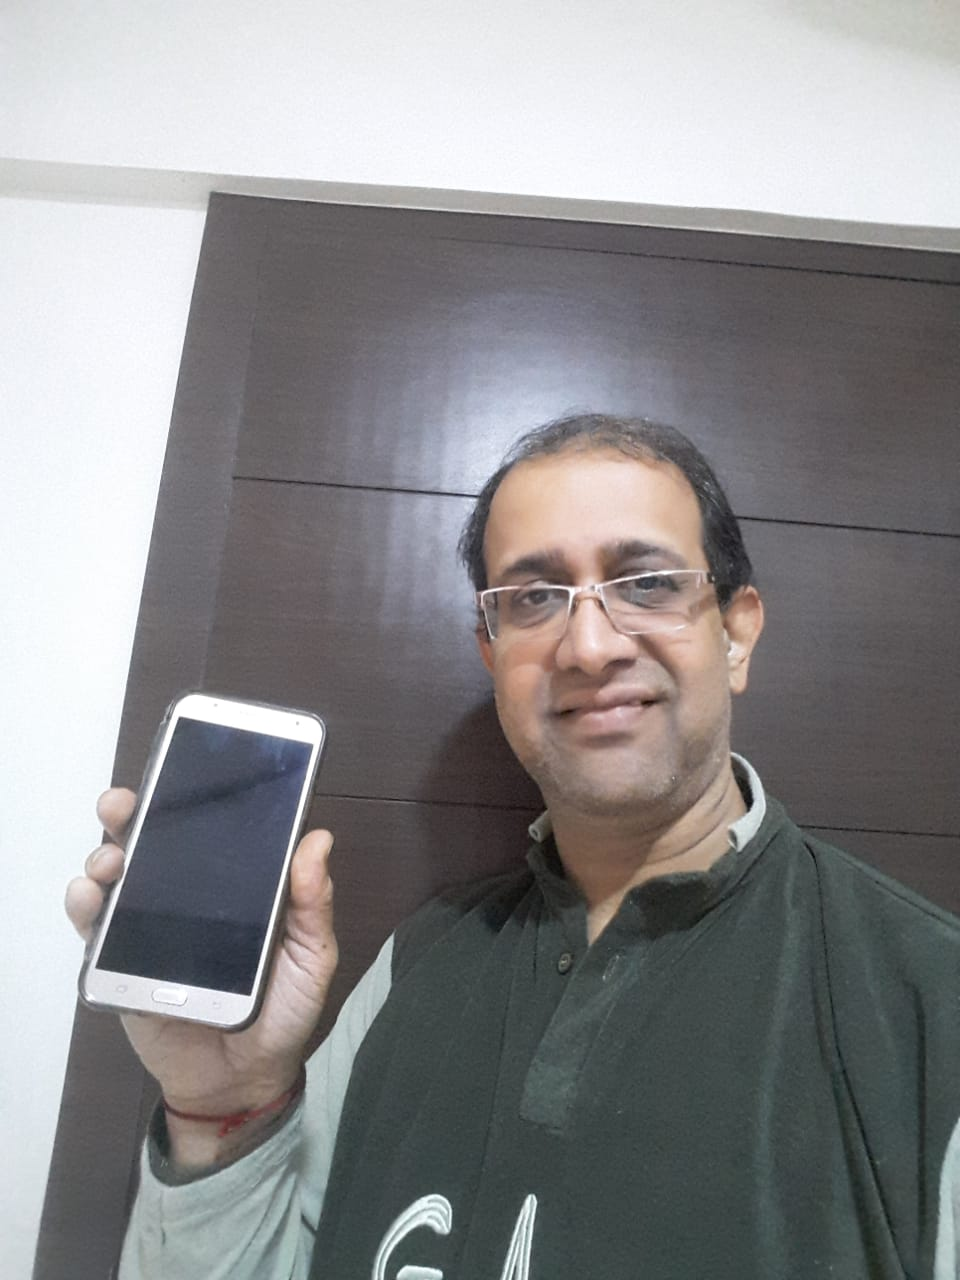

In [ ]:
from IPython.display import Image
print(img1_s1)
Image(filename=img1_s1) 

### Load Weights, Config and Classes

In [ ]:
# load YOLO
net = cv2.dnn.readNet( YOLOV3_WEIGHTS, YOLOV3_CFG)
classes = []
with open(YOLOV3_CLASS_NAMES, "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

### Load image using cv2

In [ ]:
# loading image
img = cv2.imread(img1_s1)
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape

print(img.shape)

(512, 384, 3)


### Object Detection

In [ ]:
# Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416,416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

### Display Results

In [ ]:
# Showing information on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            
            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [ ]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

#### Display result on screen

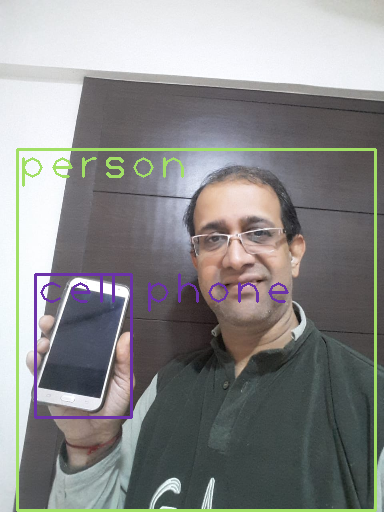

-1

In [ ]:
from google.colab.patches import cv2_imshow

font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y + 30), font, 3, color, 2)
        
cv2_imshow(img)
cv2.waitKey(0)
#cv2.destroyAllWindows()

### Save Predicted Image

In [ ]:
# save image
status = cv2.imwrite( img1_s1bb, img)
 
print("Image written to file-system : ",status)

Image written to file-system :  True
